# Capstone III Exploratory Data Analysis

In this section we 'manually' explore our data. What kind of relationships between independent and dependent variables can we find without the aid of sophisticated modeling? Exploring the data in this way can lead to a more focused approach when it comes to the modeling sections. By learning about our data, we also learn what we should do with our data.

## Section 1: Imports and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
train = pd.read_csv('../Data/train_cleaned.csv', parse_dates = ['date', 'date_time'], index_col = 'date_time')

In [3]:
train.head()

,date,co2_dining_room,co2_room,relative_humidity_dining_room,relative_humidity_room,lighting_dining_room,lighting_room,rain,sun_dusk,wind,sun_light_in_west_facade,sun_light_in_east_facade,sun_light_in_south_facade,sun_irradiance,outdoor_relative_humidity,day_of_the_week,indoor_temperature_room
date_time,,,,,,,,,,,,,,,,,
2012-03-13 11:45:00,2012-03-13,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0,17.8275
2012-03-13 12:00:00,2012-03-13,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0,18.1207
2012-03-13 12:15:00,2012-03-13,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0,18.4367
2012-03-13 12:30:00,2012-03-13,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0,18.7513
2012-03-13 12:45:00,2012-03-13,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0,19.0414


## Section 2: Column Distributions

It may be helpful to see graphs of our columns over time, all in sequence.

### 2.1: Column Values over Time

In [4]:
train.columns

Index(['date', 'co2_dining_room', 'co2_room', 'relative_humidity_dining_room',
       'relative_humidity_room', 'lighting_dining_room', 'lighting_room',
       'rain', 'sun_dusk', 'wind', 'sun_light_in_west_facade',
       'sun_light_in_east_facade', 'sun_light_in_south_facade',
       'sun_irradiance', 'outdoor_relative_humidity', 'day_of_the_week',
       'indoor_temperature_room'],
      dtype='object')

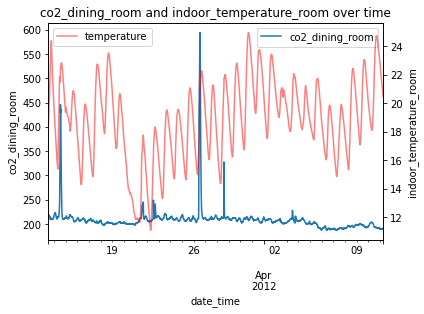

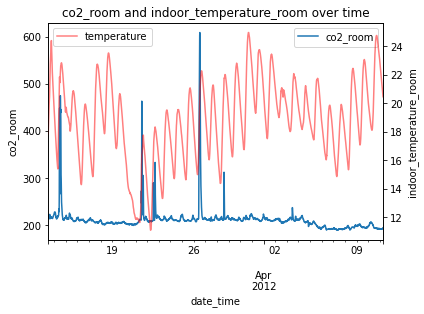

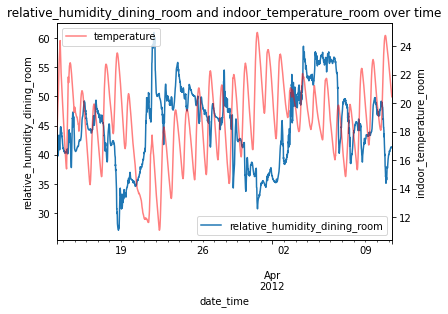

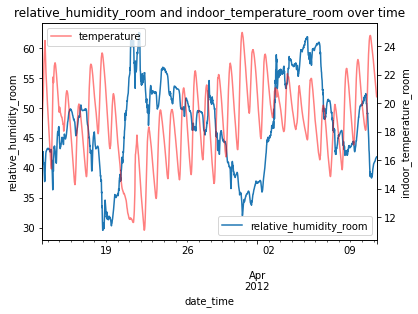

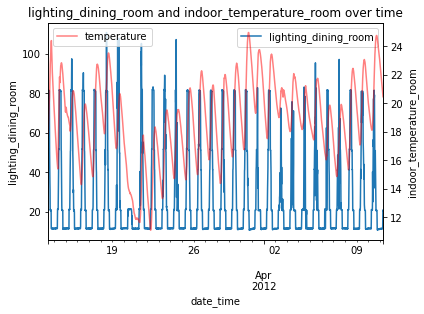

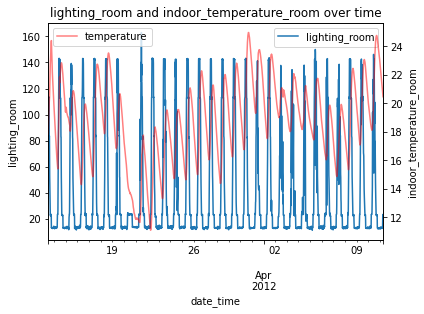

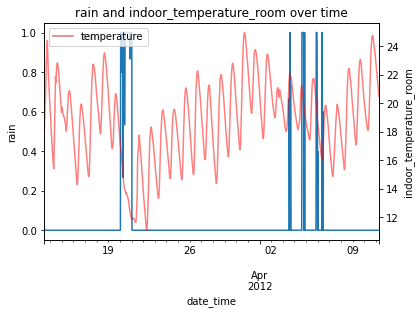

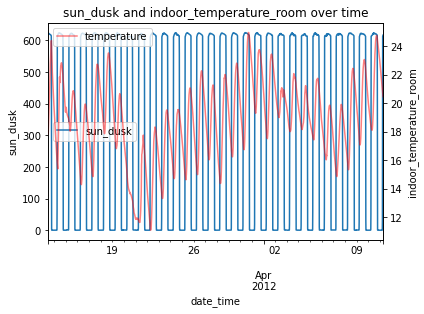

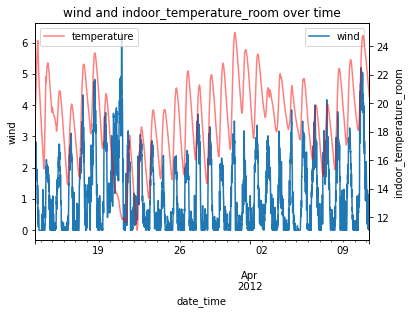

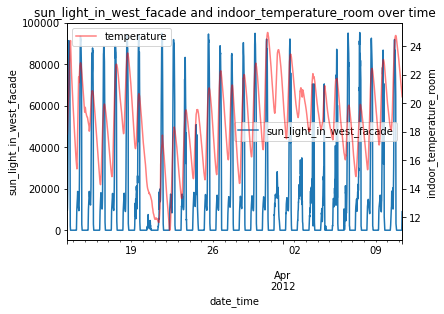

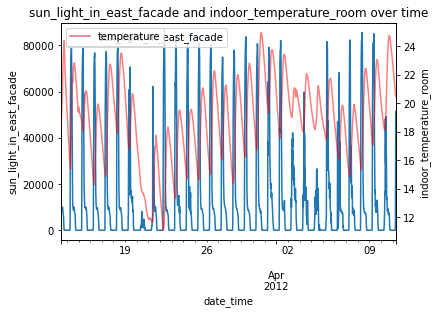

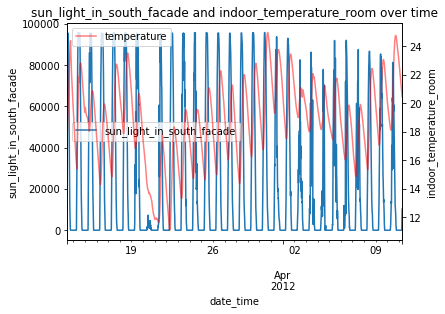

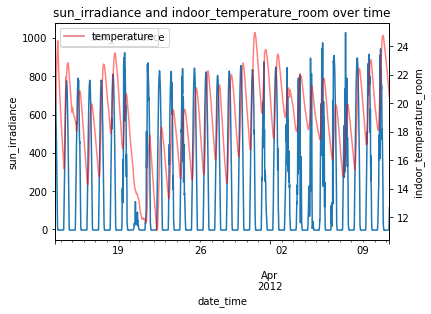

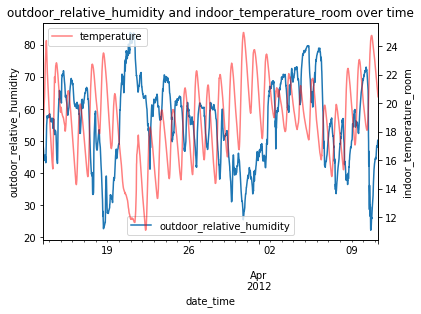

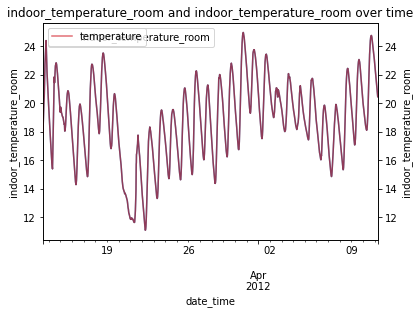

In [124]:
# Series of graphs of each column and room temperature on the same graph
no_graph = ['date', 'day_of_the_week'] # These aren't helpful to graph
for column in train.columns:
    if not column in no_graph: # Graph the other columns not in no_graph
        train[column].plot()
        plt.ylabel(column)
        plt.legend([column])
        ax2 = plt.twinx() # Create a second y axis
        train['indoor_temperature_room'].plot(c='red', alpha=0.5) # Plot the room temperature data on this second y axis
        plt.title(column + ' ' + 'and indoor_temperature_room over time')
        ax2.set_ylabel('indoor_temperature_room')
        plt.legend(['temperature'])
        plt.show()

In [6]:
train.describe()

,co2_dining_room,co2_room,relative_humidity_dining_room,relative_humidity_room,lighting_dining_room,lighting_room,rain,sun_dusk,wind,sun_light_in_west_facade,sun_light_in_east_facade,sun_light_in_south_facade,sun_irradiance,outdoor_relative_humidity,day_of_the_week,indoor_temperature_room
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,208.479123,211.065844,44.878420,47.321220,26.745381,40.732571,0.047033,325.369289,1.108531,14936.617682,12248.000148,22047.525813,215.010017,55.981988,3.954438,18.824852
std,27.032686,28.469144,6.587440,7.557795,23.298441,42.326087,0.206705,305.062614,1.161283,25964.049455,21758.550527,32709.387051,297.234046,13.019610,1.991799,2.821178
min,187.339000,188.907000,27.084000,29.594700,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.260700,1.000000,11.076000
25%,200.893250,202.682750,40.351975,42.531325,11.588700,13.265300,0.000000,0.650000,0.094833,0.000000,0.000000,0.000000,-3.381330,46.430675,2.000000,17.060350
50%,207.045500,209.408000,45.434650,47.534700,11.801300,17.690000,0.000000,611.797000,0.659000,0.000000,0.000000,0.000000,3.922000,57.477350,4.000000,19.021000
75%,211.245500,213.218750,49.352675,52.685975,31.224000,52.057350,0.000000,619.210750,1.971497,15088.000000,11131.275000,38736.575000,435.434500,65.649325,6.000000,20.828700
max,594.389000,609.237000,60.957300,62.594700,110.693000,162.965000,1.000000,624.960000,6.321330,95278.400000,85535.400000,95704.400000,1028.270000,83.805300,7.000000,24.944000


Some interseting information immediately presents intself from these graphs and statistics. Before moving on, it is important to emphasize that these graphs are using the same x=axis (time) but *not* the same y-axis. The y-axis scales are different!

- **co2_dining_room**: We see two enormous spikes, one large spike, and a few other spikes in what is relatively mean stable distribution. The three spikes occur right around March 14, 26, and 29. These are outliers, and we may consider dropping them later.

- **co2_room**: Again we see a number of spikes. The co2 levels in the room appear to have spiked on the same days as the co2 levels in the dining room, and also right around March 21 and 22. Both co2 columns have similar means at the low 200s. Neither co2 column seems to have very much correlation with the room temperature, as will become more clear in section 3.

- **Humidity columns**: It seems to have rained (or perhaps there was a water leak) on March 21 and April 4, as there are increases in humidty starting on those days. These columns appear to have some negative correlation with room temperature, meaning as humidity increases temperature decreases, and vice versa. 

- **Lighting columns**: A pair of truly periodic columns, peaking and troughing daily as the sun rises and falls. March 20 seems to have gotten almost no light (about 20 lux), as there is a massive decrease in light from the usual day time lux. Perhaps the measurement devices failed that day or something interfered with their recording. Althogh, interestingly, room temperature takes a dive on those days as well.

- **Rain**: Confirming our earlier intuition, it rained on the night of March 20 and showered between April 4 and 5. The presence of rain seems to result in lower room temperature.

- **sun_dusk**: Still not sure what this column means. But it jumped between zero and ~600 daily in a very periodic fashion. Sun dusk hasn't suffered the same drop on March 20 that the lighting columns did. There doesn't seem to be any correlation with room temperature.

- **Wind**: Wind has pretty mean stable daily fluctuations with a particularly windy day on evening of March 20 and day of April 10. The March 20 windy day saw a drop in room temperature.

- **Sunlight columns**: Lighting on the various facades of the houses rise and fall daily, as we'd expect. The south facade got considerabily more light on average than the east or west facades did. This house is in the northern hemisphere. Something may have gone wrong with the sensors for March 20, where the light on all three facades was far below average. On days where sunlight is low, room temperature falls as well.

- **Sun irradiance** seems covariant with the sunlight columns, complete with the global minimum on March 20.

- **outdoor_relative_humidity** readings are a little less clear as far as tracking when it was raining, but there are maxima on the days that it did rain (March 20 and April 4-5). It was more humid outdoors compared to indoors, as we would expect.

- **indoor_temperature_room**, the target variable, follows some expected behavior. It has a periodic peaks and valleys with a difference of about 6 or 7 degrees celsius corresponding to day and night time. It reaches its minimum on March 21, the day after one of the heavy rain days. Then between March 21 about April 4 we see an upward trend, followed by a slight downward trend from the rain, and then an upward trend again starting about April 7. If we were to make guesses on the forecasting of this temperature from eyeballing graphs alone we might say that the mean temperature is most affected by rainfall. Therefore, we might expect the mean temperature to fall again when the next rainfall occurs. 

And just before moving on it may serve to make things a little more clearer, visually, if we generate the same plots as above but downsampled to daily measurements instead of 15 minute periods.

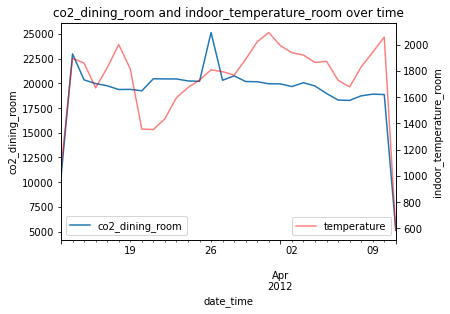

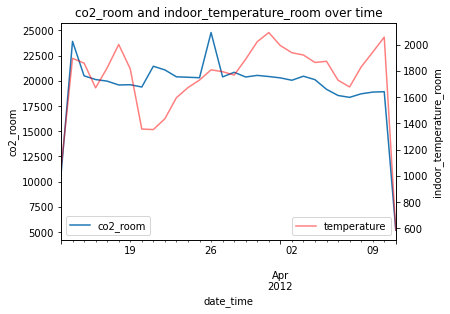

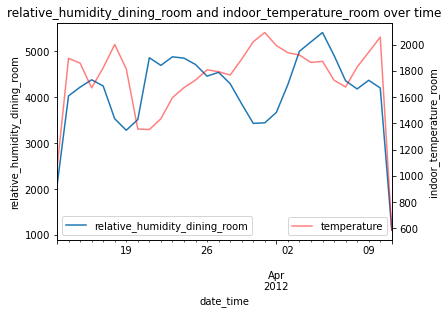

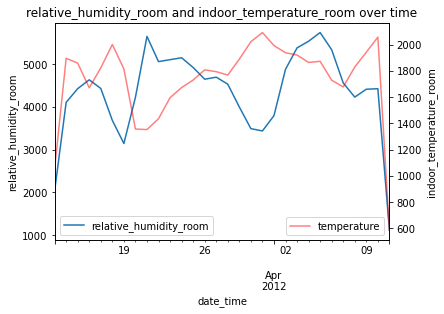

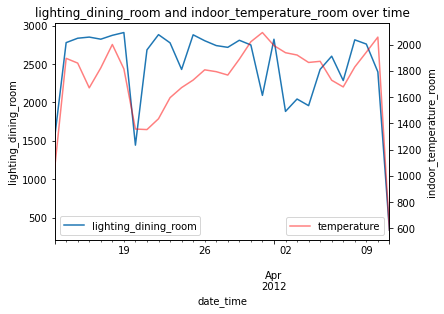

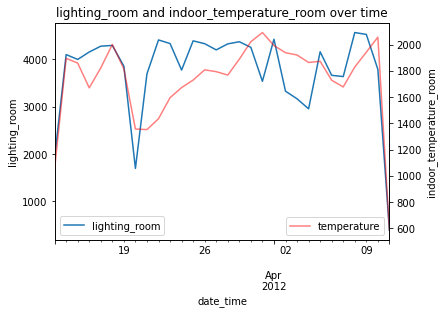

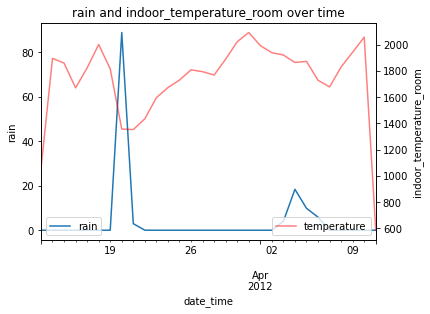

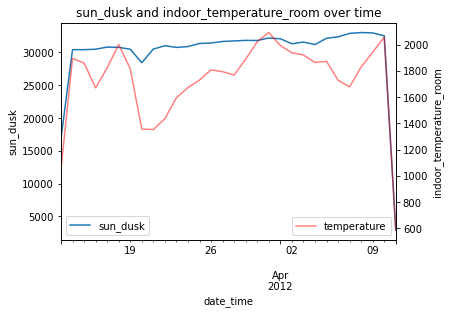

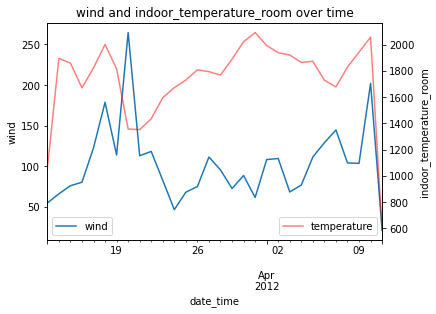

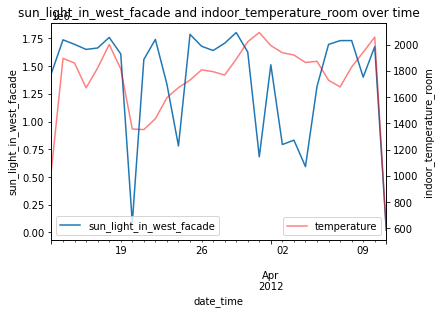

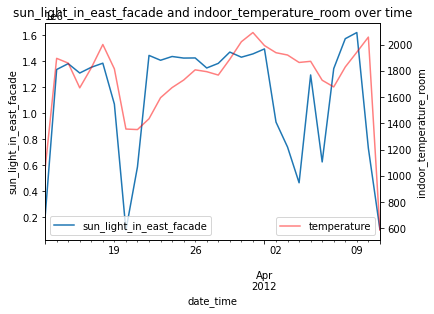

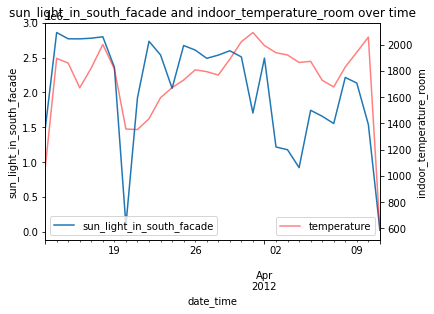

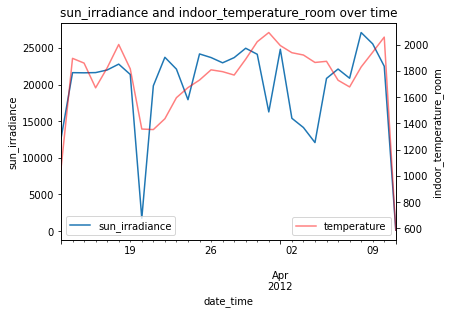

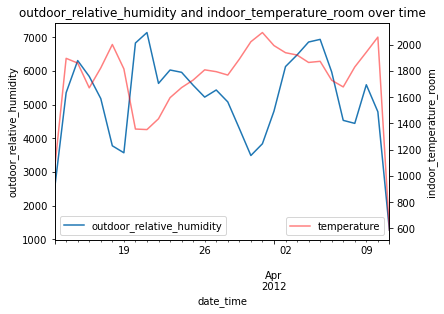

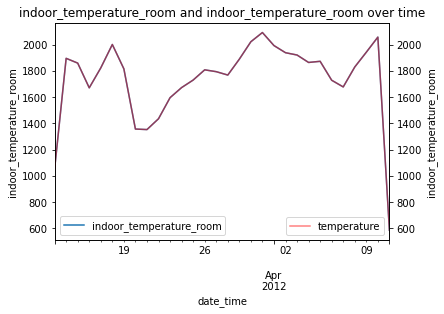

In [126]:
for column in train.columns:
    if not column in no_graph:
        train[column].resample('1D').sum().plot()
        plt.ylabel(column)
        plt.legend([column], loc = 3)
        ax2 = plt.twinx() # Create a second y axis
        train['indoor_temperature_room'].resample('1D').sum().plot(c='red', alpha=0.5)
        plt.title(column + ' ' + 'and indoor_temperature_room over time')
        ax2.set_ylabel('indoor_temperature_room')
        plt.legend(['temperature'], loc = 4)
        plt.show()

### 2.2 Percent Change over Time

Viewing the percent change of each column with the percent change of our target variable may also be helpful for understanding their relationships. Seeing simple correlations can sometimes lead us to make spurious connections: for example the Dow Jones Industrial average stock price increases as UFO sightings increase, and of course there is no relationship between the two. Viewing the correlation between the percent changes, rather than absolute increases and decreases in column values, can help us be more sure about correlations. 

The first three cells demonstrate that computing the percent change of the rain variable results in strange results. Rain in this data set is (mostly) categorical, although there are values between zero and one. We might think the percent change between two non rainy days, i.e. zero and zero, is zero. Python produces a NaN for these instances. We'll leave it out of this section.

In [8]:
train['rain'].unique()

array([0.       , 0.8      , 1.       , 0.933333 , 0.266667 , 0.533333 ,
       0.733333 , 0.866667 , 0.0666667, 0.666667 , 0.4      , 0.333333 ,
       0.133333 , 0.6      , 0.466667 ])

In [9]:
train['rain'].pct_change().unique()

array([        nan,         inf,  0.25      ,  0.        , -0.066667  ,
       -0.14285684, -0.733333  ,  2.74999531, -0.466667  ,  0.37500023,
        0.36363698, -0.133333  ,  0.15384571, -1.        ,  9.        ,
       -0.4000003 ,  2.000003  , -0.333333  , -0.81818219,  0.87500117,
       -0.866667  , -0.42857158,  0.25000141, -0.4       ,  0.66666667,
        0.28571337])

In [10]:
df_dummy = pd.DataFrame({'rain':[0,0,0,1,1,0]})
df_dummy['rain_pct_change_test'] = df_dummy.rain.pct_change(fill_method='ffill')
df_dummy

,rain,rain_pct_change_test
0,0,NaN
1,0,NaN
2,0,NaN
3,1,inf
4,1,0.0
5,0,-1.0


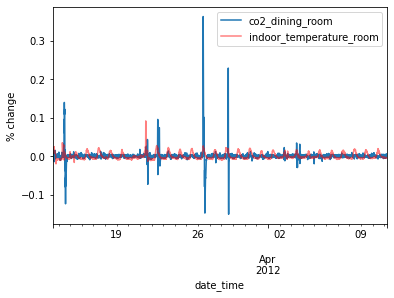

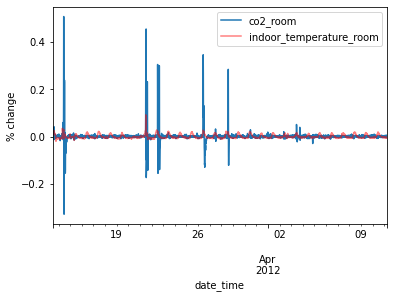

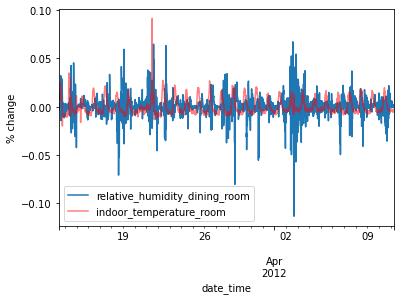

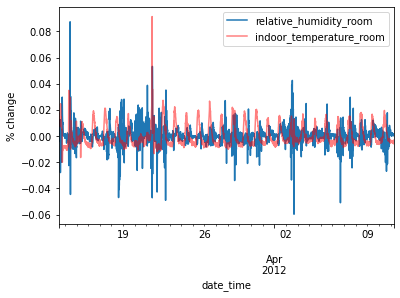

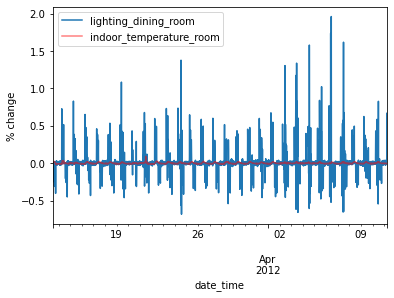

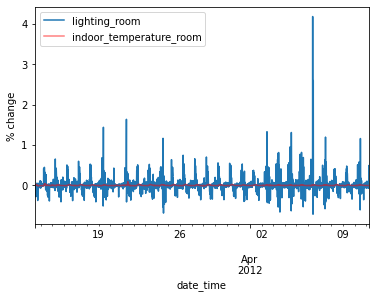

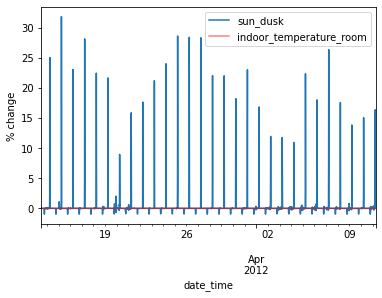

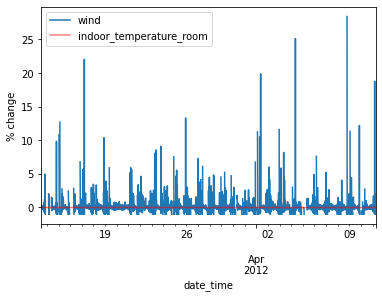

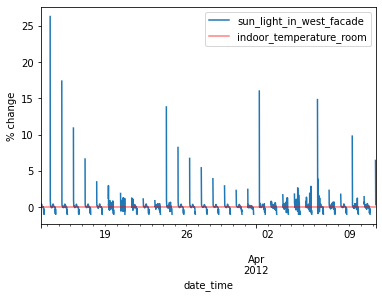

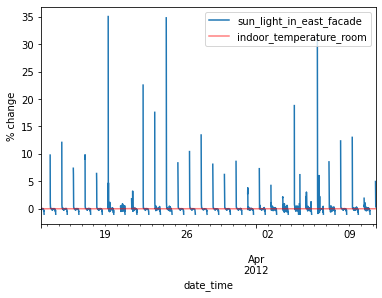

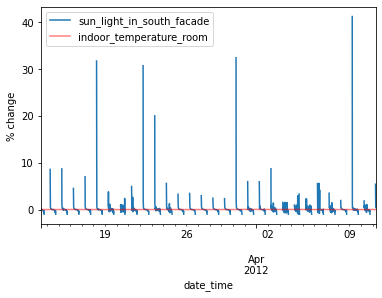

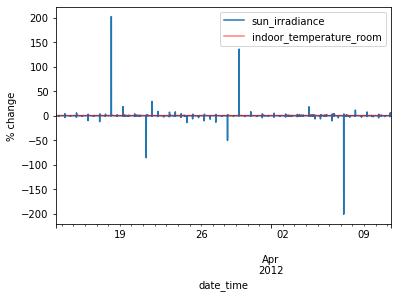

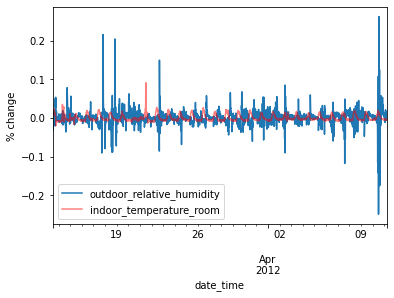

In [130]:
# The rain column is rather more categorical than the others, and will result in NaN values for pct change. Exclude it.
no_graph_pct_change = no_graph.copy() + ['rain', 'indoor_temperature_room'] # Also don't need to graph indoor_temperature_room
for column in train.columns:
    if not column in no_graph_pct_change: # Graph the other columns
        change = train[column].pct_change()
        change.plot(label = column)
        train['indoor_temperature_room'].pct_change().plot(c='red', alpha=0.5, label = 'indoor_temperature_room')
        plt.ylabel('% change')
        plt.legend()
        plt.show()

In [129]:
statistics_columns = train.columns.drop(['date', 'day_of_the_week', 'rain'])
train[statistics_columns].pct_change().describe()

,co2_dining_room,co2_room,relative_humidity_dining_room,relative_humidity_room,lighting_dining_room,lighting_room,sun_dusk,wind,sun_light_in_west_facade,sun_light_in_east_facade,sun_light_in_south_facade,sun_irradiance,outdoor_relative_humidity,indoor_temperature_room
count,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2460.000000,1398.000000,1406.000000,1394.000000,2763.000000,2763.000000,2763.000000
mean,0.000065,0.000275,0.000070,0.000022,0.011172,0.012656,0.300483,inf,inf,inf,inf,-inf,0.000212,0.000081
std,0.015236,0.026676,0.010767,0.007380,0.163513,0.186012,2.347639,NaN,NaN,NaN,NaN,NaN,0.019853,0.008015
min,-0.150820,-0.328203,-0.113691,-0.059768,-0.682641,-0.715731,-0.974020,-1.000000,-1.000000,-1.000000,-1.000000,-inf,-0.249657,-0.020053
25%,-0.002134,-0.002428,-0.003351,-0.002661,-0.012878,-0.035572,-0.000548,-0.250637,-0.071287,-0.151375,-0.171224,-0.054789,-0.006901,-0.005347
50%,-0.000053,-0.000256,0.000221,0.000171,0.000000,-0.000089,0.000000,-0.013671,0.013645,-0.029548,-0.009772,0.000000,0.000362,-0.003114
75%,0.001862,0.001992,0.003905,0.002763,0.013999,0.030287,0.000413,0.333362,0.183065,0.053638,0.137520,0.047117,0.007111,0.003948
max,0.362564,0.506876,0.067288,0.087416,1.960604,4.178807,31.824657,inf,inf,inf,inf,202.020512,0.263016,0.091444


Since we're looking at percent changes rather than absolute differences, it is appropriate to graph each column with temperature on the same set of axes. It is perhaps easier to remark about the correlation between each column and the room temperature over time when viewing these graphs.

- **co2 columns**: As before, the changes in the CO2 variables and the room temperature variable don't seem to have much to do with each other. CO2 is much more stable outside of a few large spikes. At the co2 spikes temperature also has a greater than usual positive percent change, but nowhere even close to CO2's except on March 21 where temperature also spiked. The largest madnitude percent change in the co2 columns is only about 0.51%. Room temperature has greater normal variance than the CO2 columns. CO2's outliers are quite vivid in the graphs and in the summary statistics table. 

- **Humidity columns**: The humidity columns are quite stable, with no percent change greater in magnitude than ~0.11%. There are also extreme outliers in these columns, and extreme spikes occur in these columns more often than in the room temperature column. There appears to be some correlation, though it may be weak. 

- **Lighting columns**: The lighting columns have a high daily variance in percent change. They're relativey unstable, which is to be expected as light varies quite a bit from day time to night time. Lighting in the room differs by as much as 4% between readings.

- **sun_dusk**: Sun dusk is highly unstable with huge cyclical swings in percent change. Sun dusk changes by as much as 31% between readings.

- **Wind**: Wind has a number of spikes in percent change, about 6, and in the low 20% range. It regularly has lesser spikes of about 5 to 10%. There is what seems to be daily periods of inactivity where groups of measurements see maybe a percent or two change. It appears the .diff() method did not cleanly calculate all the differences for these values, as the summary statistics show NaN's and inf values.

- **Sunlight columns**: The sunlight columns seem to have about 6 or so spikes in percent change each getting in to the 20-30% range. This is odd, and not immediately visible from the standard line plots we did earlier. It appears the .diff() method did not cleanly calculate all the differences for these values, as the summary statistics show NaN's and inf values. 

- **Sun irradiance** This column has about 5 spikes in percent change. It appears the .diff() method did not cleanly calculate all the differences for these values, as the summary statistics show NaN's and inf values. 

- **outdoor_relative_humidity** Percent changes are pretty stable with the exceptions being on the two instances of rain (March 20 and April 4-5). The greatest percent change was ~26%.

## Section 3: Column Distributions

### 3.1 Column Correlation with Room Temperature

Here we look at scatter plots of each column against our target variable, indoor_temperature_room.

[]

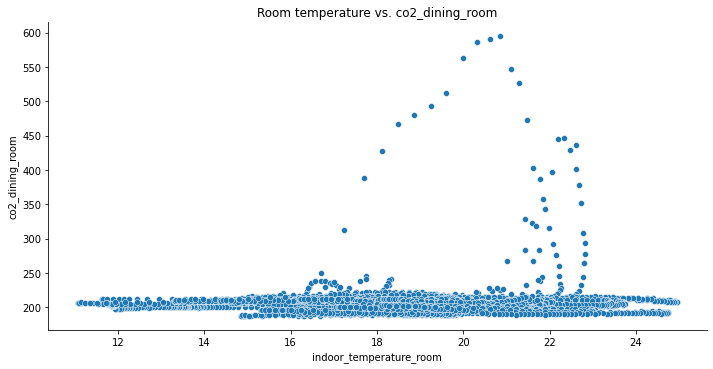

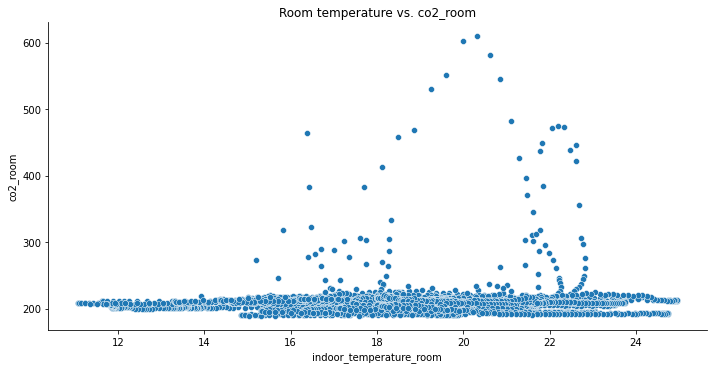

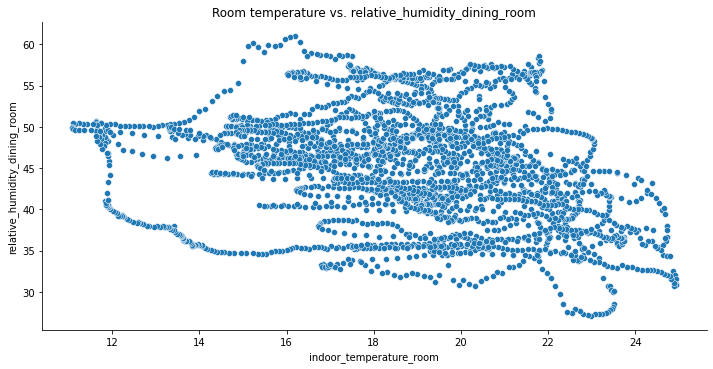

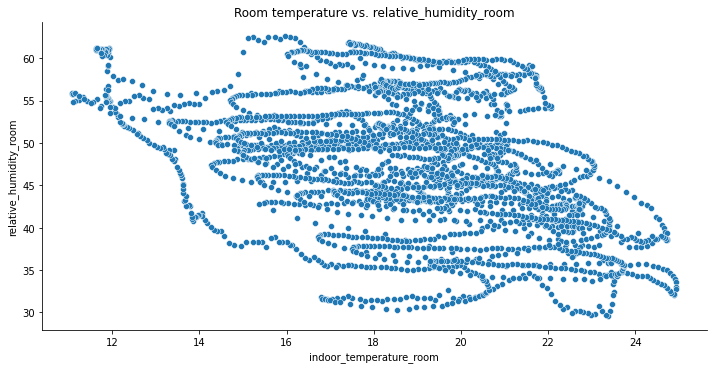

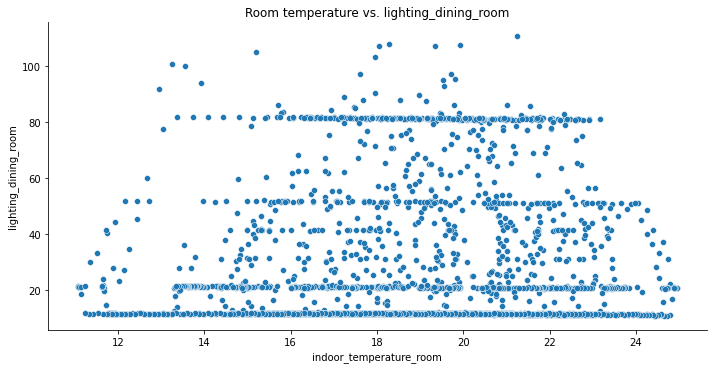

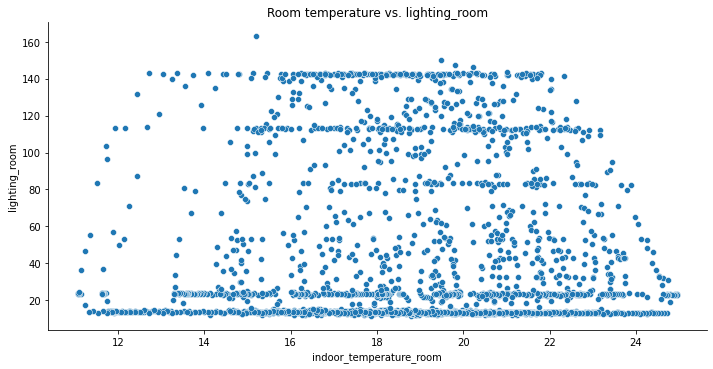

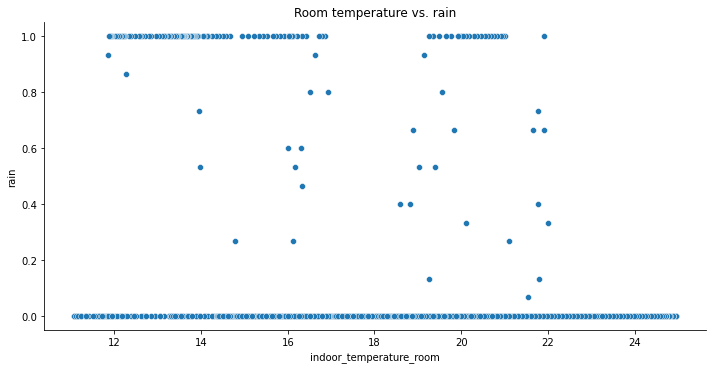

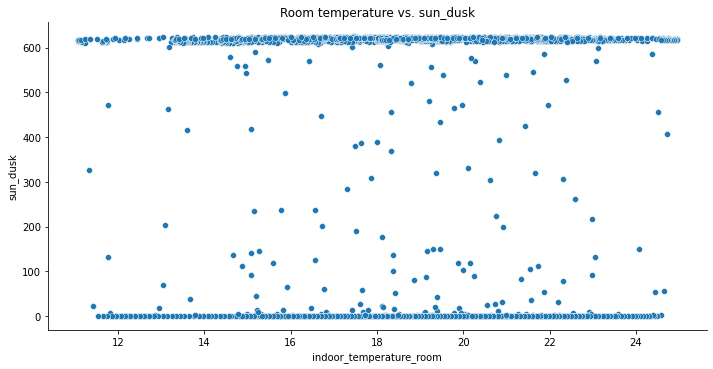

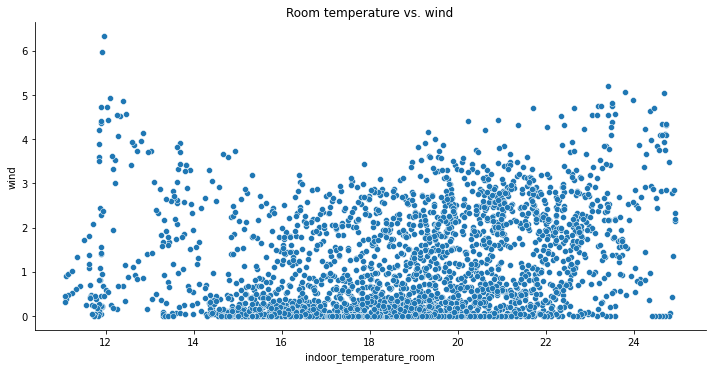

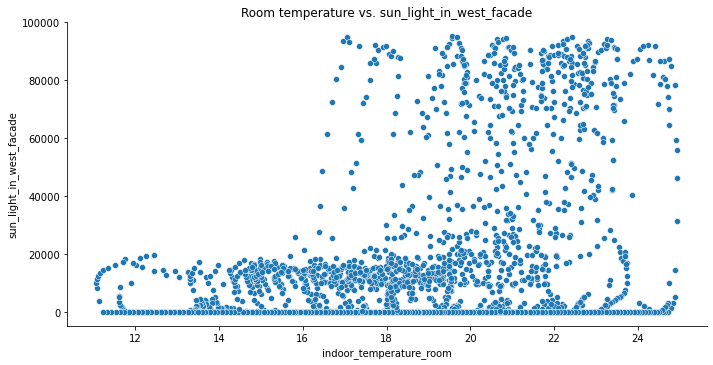

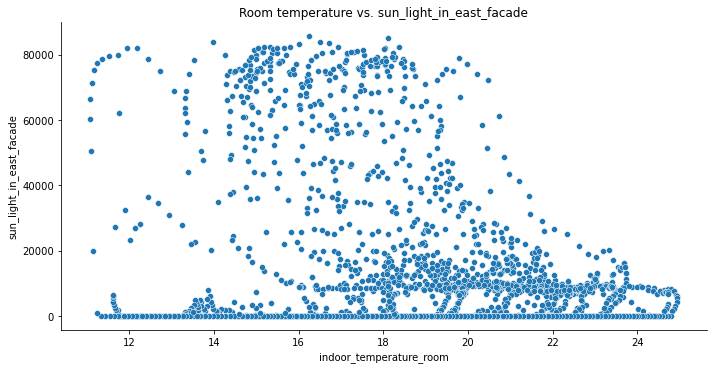

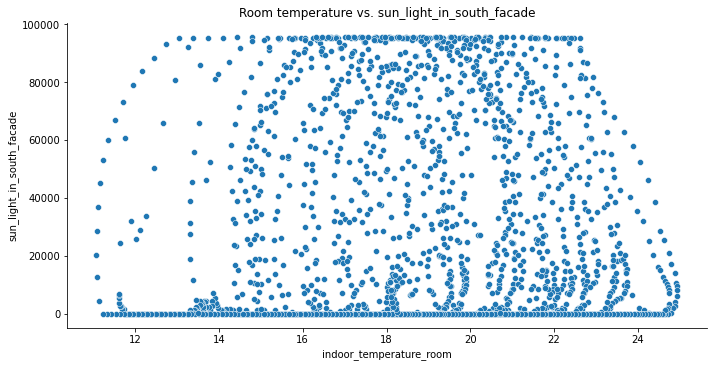

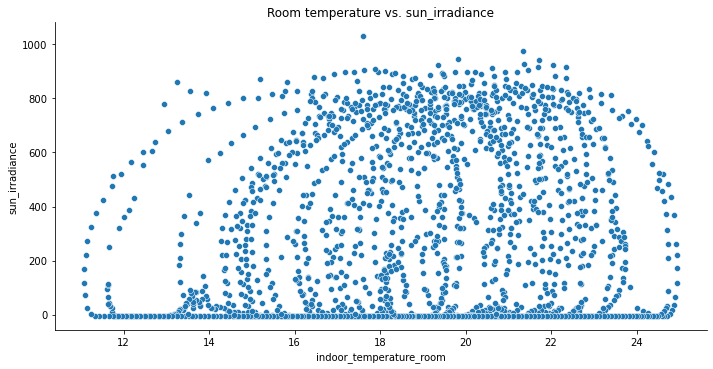

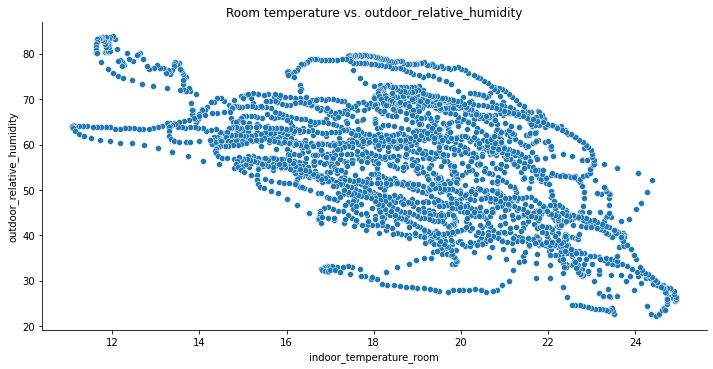

In [131]:
no_graph_scatter = no_graph.copy() + ['indoor_temperature_room']
for column in train.columns:
    if not column in no_graph_scatter:
        change = train[column].pct_change()
        sns.relplot(data = train, x = 'indoor_temperature_room', y = column, kind = 'scatter',
           height = 5, aspect = 2)
        plt.title('Room temperature vs.' + ' ' + column)
plt.plot()

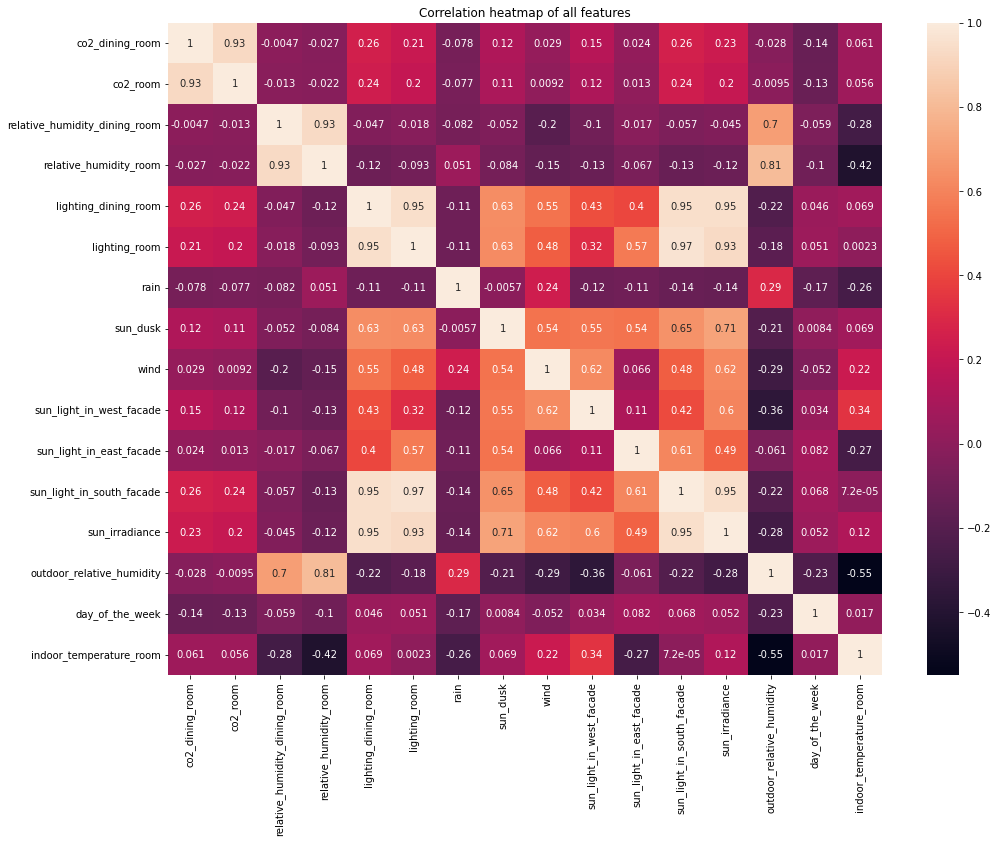

In [14]:
plt.figure(figsize = (16,12))
sns.heatmap(train.corr(), annot = True)
plt.title('Correlation heatmap of all features')
plt.show()

Nothing correlates very strongly with room temperature, positively or negatively. In the series of graphs above there isn't much of a linear relationship between any variable and room temperature. The closest to a linear relationship we can see is outdoor_relative_humidity and temperature having a negative correlation. 

- Positive correlations: From the heatmap of correlations we see that, weakly, room temperature increases as wind increases (0.22 pearson correlation coefficient). We also see that room temperature increase, a little more strongly, as sunlight in the west facade increases (0.34).

- Negative correlations: from the heatmap of correlations we see that as outdoor_relative_humidity (-0.55), relative_humidity_room (-0.42), relative_humidity_dining_room (-0.28), sunlight_in_east_facade (-0.27) and rain (-0.26) increase, room temperature decreases. 

- The rest of the columns have very little correlation with room temperature.

### 3.2 Column Percent Change with Room Temperature Percent Change Correlation

In [15]:
# This is just to get a list of the correct columns to call pct_change() on
pct_change_columns = set(train.columns) - set(no_graph.copy())
pct_change_columns

{'co2_dining_room',
 'co2_room',
 'indoor_temperature_room',
 'lighting_dining_room',
 'lighting_room',
 'outdoor_relative_humidity',
 'rain',
 'relative_humidity_dining_room',
 'relative_humidity_room',
 'sun_dusk',
 'sun_irradiance',
 'sun_light_in_east_facade',
 'sun_light_in_south_facade',
 'sun_light_in_west_facade',
 'wind'}

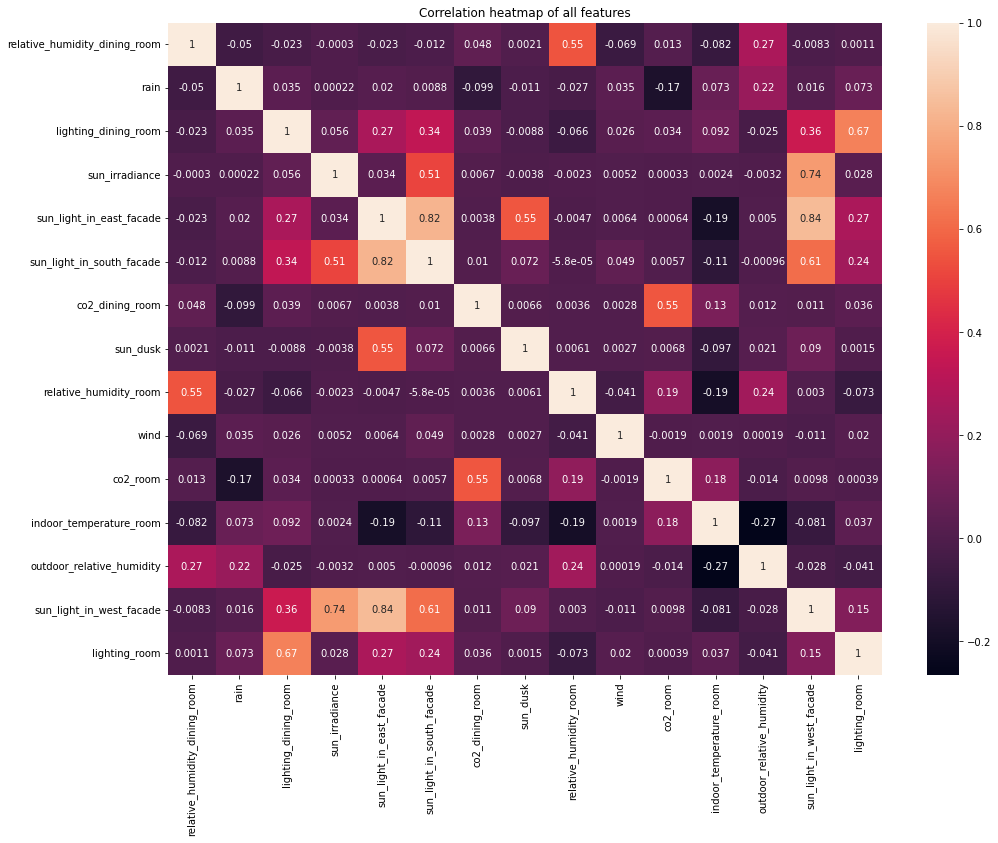

In [16]:
plt.figure(figsize = (16,12))
sns.heatmap(train[pct_change_columns].pct_change().corr(), annot = True)
plt.title('Correlation heatmap of all features')
plt.show()

The correlation heatmap of percent changes paint a different picture. The percent change for indoor_temperature_room has practically no correlation with anything. It's highest positive correlation coefficient is 0.18 and 0.13 for co2_room and co2_dining_room, respectively. It's lowest negatie correlation is -0.27 and -0.19 for outdoor_relative_humidity and sun_light_in_east_facade, respectively.

## Section 4: "Signal" in Room Temperature over Time

Above we took a look at the relationship between each variable and the target variable ordered in time and without respect to time. Now we look purely at the relationship between time and our target variable. 

When modeling time series data it is important to render your data into a stationary version of itself, characterized as white noise, so that it can be described by a statistical distribution. That is, the data needs to be rendered in such a state that the values don't depend on their previous values. There are three things to look out for when making your data stationary: trend, seasonality, and autocorrelation.

**Trend** is the over all direction of the data. Is the mean of the data increasing or decreasing over time? Global CO2 concentrations might be said to be have a positive trend, as over the long run they are increasing overall even if there are month to month or year to year drops.

**Seasonaility** is the tendency for the data to have smaller scale oscillations, like the sinusoidal peaking and troughing of temperature during a 24 hour period.

**Autocorrelation** is the correlation coefficient of a time series with a lagged copy of itself. Even after removing trend and seasonality there may be some memory in your series. A high autocorrelation means the values of a time series are highly correlated with k periods past values.

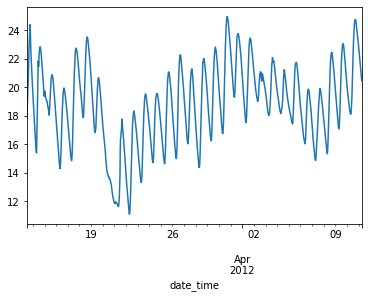

In [3]:
train['indoor_temperature_room'].plot()
plt.show()

There doesn't seem to be a trend. There are linear trends in smaller chunks of the time series, like a positive trend from March 22 to April 01, then a negative one from April 01 to April 08, then a positive trend starts up again. It's as if the data has large scale month to month seasonality. In general, there doesn't appear to be a trend.

In [71]:
frequency

0.010416666666666666

<Figure size 432x288 with 0 Axes>

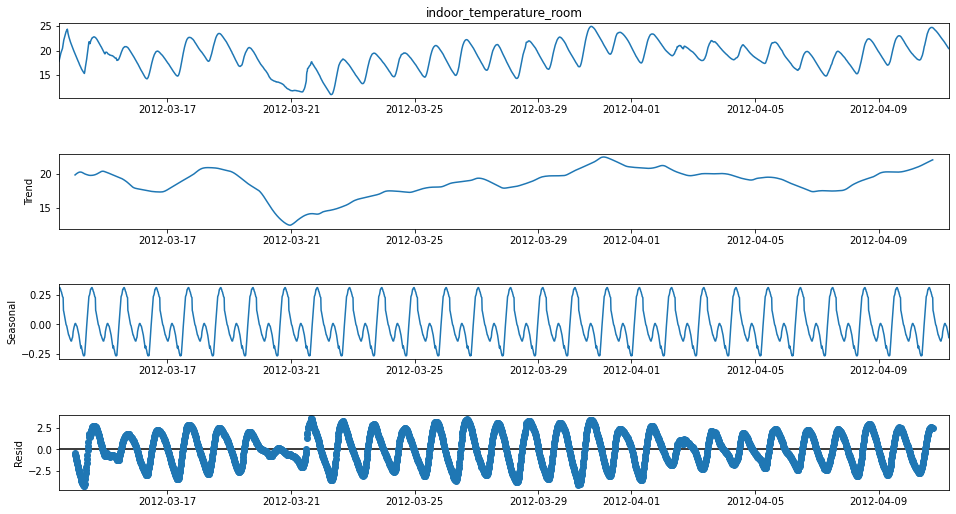

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

frequency = (15) * (1/60) * (1/24)
decomposition = seasonal_decompose(train['indoor_temperature_room'], period = 100)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [109]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 100).mean()
    rolstd = timeseries.rolling(window = 100).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

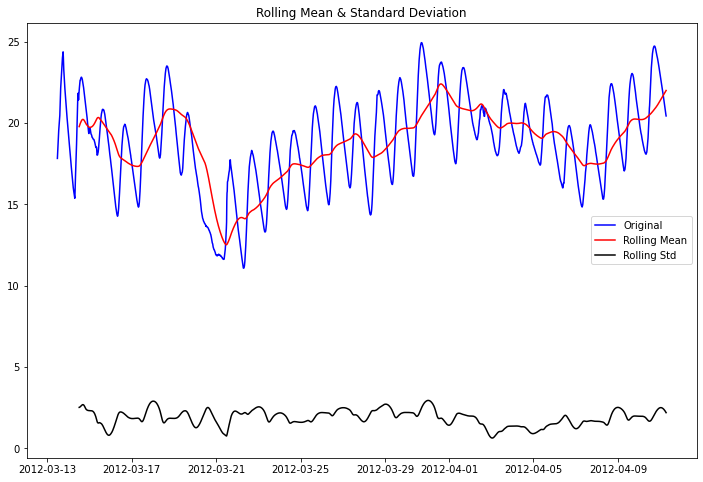

Results of Dickey-Fuller Test:
Test Statistic                -5.750770e+00
p-value                        5.973893e-07
#Lags Used                     1.400000e+01
Number of Observations Used    2.749000e+03
Critical Value (1%)           -3.432731e+00
Critical Value (5%)           -2.862592e+00
Critical Value (10%)          -2.567330e+00
dtype: float64


In [110]:
test_stationarity(train['indoor_temperature_room'])

In [115]:
# Compute and print the autocorrelation of returns
autocorrelation = train['indoor_temperature_room'].diff().autocorr()
print("The autocorrelation of indoor_temperature_room is %4.2f" %(autocorrelation))

The autocorrelation of indoor_temperature_room is 0.94


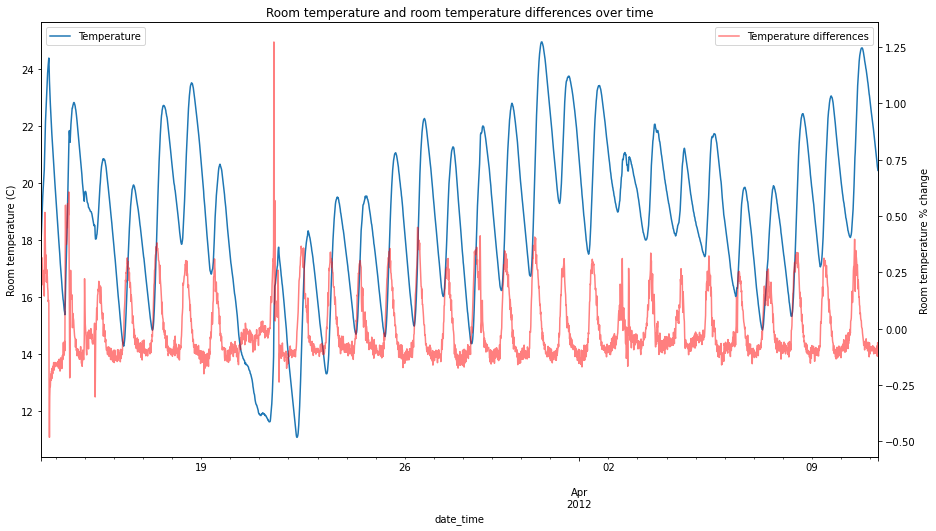

In [121]:
plt.figure(figsize=(15,8))
train['indoor_temperature_room'].plot()
plt.ylabel('Room temperature (C)')
plt.legend(['Temperature'], loc = 2)
ax2 = plt.twinx()
train['indoor_temperature_room'].diff().plot(c='red', alpha=0.5)
ax2.set_ylabel('Room temperature % change')
plt.title('Room temperature and room temperature differences over time')
plt.legend(['Temperature differences'])
plt.show()

In [17]:
# Compute the percentage change of prices
returns = train[pct_change_columns].pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['indoor_temperature_room'].autocorr()
print("The autocorrelation of indoor_temperature_room is %4.2f" %(autocorrelation))

The autocorrelation of indoor_temperature_room is 0.93


0.93 is a very high positive correlation. This means that the indoor_temperature_room series is highly correlated with its one day lagged copy. A daily increase or decrease in temperature is quite likely to mean an increase or decrease in temperature the next day. Below we visualize this.

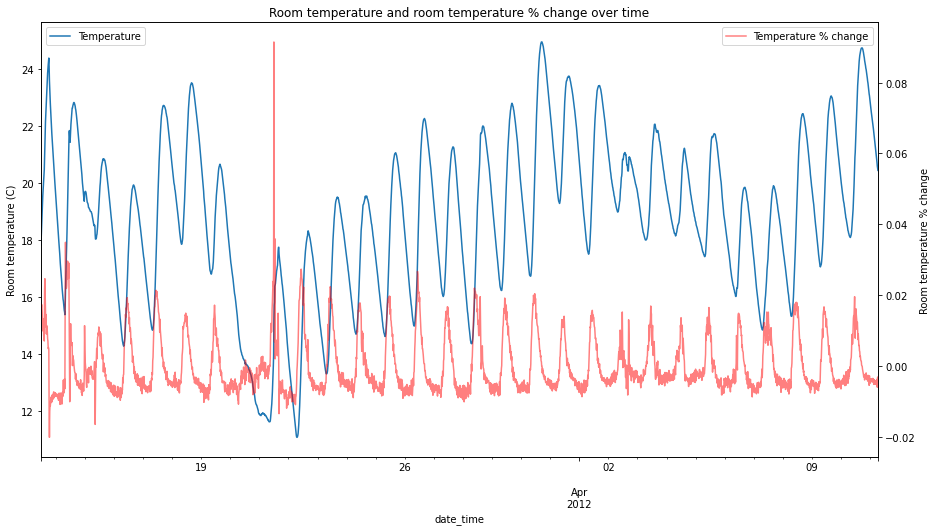

In [122]:
plt.figure(figsize=(15,8))
train['indoor_temperature_room'].plot()
plt.ylabel('Room temperature (C)')
plt.legend(['Temperature'], loc = 2)
ax2 = plt.twinx()
train['indoor_temperature_room'].pct_change().plot(c='red', alpha=0.5)
ax2.set_ylabel('Room temperature % change')
plt.title('Room temperature and room temperature % change over time')
plt.legend(['Temperature % change'])
plt.show()